R2 Score: 0.9901915173617597


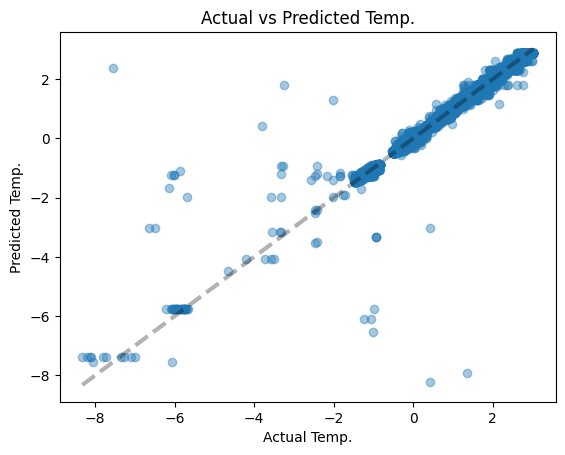

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Load dataset
df = pd.read_csv('./iot_sensor_data.csv')

# Convert timestamp
df['ts'] = pd.to_datetime(df['ts'], unit='s')

# Encode Sensor IDs
le = LabelEncoder()
df['device'] = le.fit_transform(df['device'])

# Feature engineering
df['hour'] = df['ts'].dt.hour
df['dayofweek'] = df['ts'].dt.dayofweek

df['temp_roll_mean'] = df['temp'].rolling(window=3).mean()
df['temp_roll_std'] = df['temp'].rolling(window=3).std()

df['humidity_roll_mean'] = df['humidity'].rolling(window=3).mean()
df['humidity_roll_std'] = df['humidity'].rolling(window=3).std()

scaler = StandardScaler()
df[['temp', 'humidity']] = scaler.fit_transform(df[['temp', 'humidity']])

# Split features and target
target = 'temp'
features = [c for c in df.columns if c not in ['ts', target]]
X = df[features]
y = df[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree regression algorithm
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Evaluate on test data
print('R2 Score:', dt_model.score(X_test, y_test))

y_pred = dt_model.predict(X_test)

# Plot actual vs predicted temperatures
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.4)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, alpha=0.3)
ax.set_xlabel('Actual Temp.')
ax.set_ylabel('Predicted Temp.')
ax.set_title("Actual vs Predicted Temp.")

plt.show()
